# **Lab 4 : CLUSTERING Part 1**

In this Lab we shall write code for 2 clustering algorithms based on the mathematical theory :

1. K-means Clustering
2. Gaussian Mixture Model
3. Application of Clustering: Iris Flower Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# K-means Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. 



**Step 1 : Data Generation** 

Generate 2D gaussian data of 4 types each having 100 points, by taking appropriate mean and varince (example: mean :(0.5 0) (5 5) (5 1) (10 1.5), variance : Identity matrix)

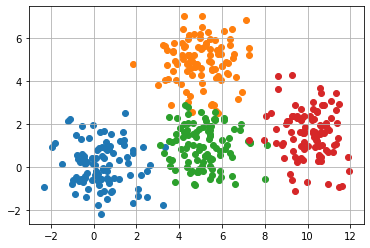

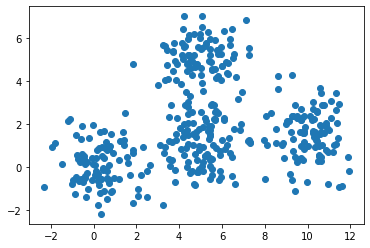

In [2]:
# write your code here
d1 = np.random.multivariate_normal((0.5, 0.0), np.identity(2), 100)
d2 = np.random.multivariate_normal((5.0, 5.0), np.identity(2), 100)
d3 = np.random.multivariate_normal((5.0, 1.0), np.identity(2), 100)
d4 = np.random.multivariate_normal((10.0, 1.5), np.identity(2), 100)
ax1 = plt.figure()
plt.grid()
# print(d1)
plt.scatter(d1[:,0], d1[:,1])
plt.scatter(d2[:,0], d2[:,1])
plt.scatter(d3[:,0], d3[:,1])
plt.scatter(d4[:,0], d4[:,1])

zeroarr = np.zeros(100)
onearr = np.ones(100)
twoarr = 2*onearr
threearr = 3*onearr
real_labels = np.concatenate((zeroarr, onearr, twoarr, threearr))
# print(real_labels)
# concatenate all this to form an unlabelled dataset
full_dist = np.concatenate((d1,d2,d3,d4))
ax2 = plt.figure()
plt.scatter(full_dist[:,0], full_dist[:,1])


**Step 2 : Cluster Initialisation**

Initialse K number of Clusters (Here, K=4)

[[ 5.52554107 -0.39210335]
 [ 7.29749806  1.08096396]
 [-0.19578086  1.34595606]
 [ 4.49952192  3.30275631]]
(4, 2)


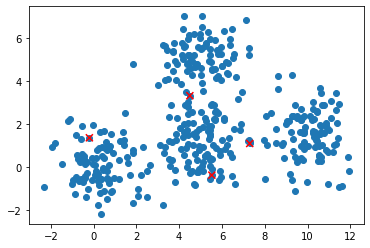

In [3]:
# write your code here
K = 4
centroids = full_dist[np.random.choice(len(full_dist), size=K, replace=False)]
print(centroids)
plt.scatter(full_dist[:,0], full_dist[:,1])
plt.scatter(centroids[:,0], centroids[:,1], marker='x', color='r', s=50*np.ones(len(centroids)))
print(centroids.shape)

**Step 3 : Cluster assignment and re-estimation Stage**

a) Using initial/estimated cluster centers (mean $\mu_{i}$) perform cluster assignment.

b) Assigned cluster for each feature vector ($X_{j}$) can be written as:
$$arg \min_{i} ||C_{i}-X_{j}||^{2},~1 \leq i \leq K,~1\leq j \leq N$$ 
c) Re-estimation: After cluster assignment, the mean vector is recomputed as,
$$\mu_{i}=\frac{1}{N_{i}}\sum_{j \in i^{th} cluster}X_{j}$$
where $N_{i}$ represents the number of datapoints in the $i^{th}$ cluster.

d) Objective function (to be minimized):
$$Error(\mu)=\frac{1}{N}\sum_{i=1}^{K}\sum_{j \in i^{th} cluster}||C_{i}-X_{j}||^{2}$$

________________________________________________________________________________________
Iteration  0
error =  2.9372589987887903


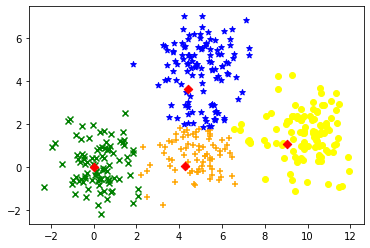

________________________________________________________________________________________
Iteration  1
error =  2.6583694404385394


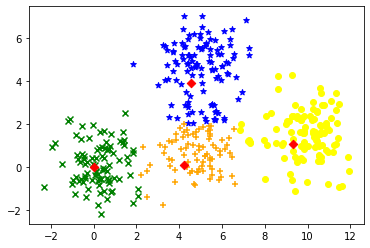

________________________________________________________________________________________
Iteration  2
error =  2.5956695450827034


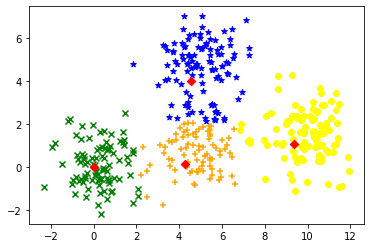

________________________________________________________________________________________
Iteration  3
error =  2.575309344532995


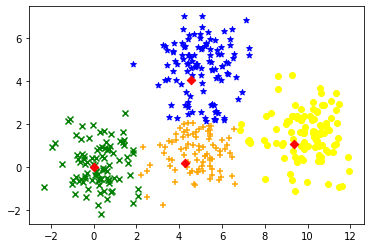

________________________________________________________________________________________
Iteration  4
error =  2.575309344532995


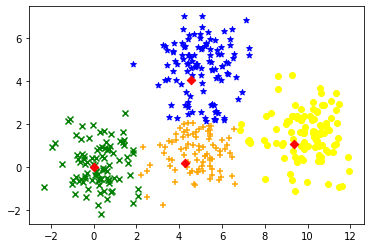

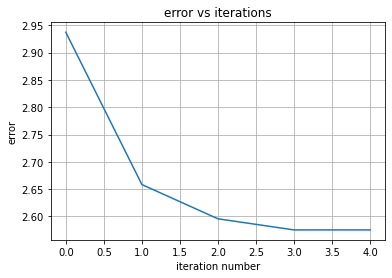

In [4]:
# write your code here

Runs = 50
# distance func
# import sys

def dist(a, b):
    d = (a[1] - b[1])**2 + (a[0] - b[0])**2
    return d

# func to find nearest centroid to some point x
def find_nearest_centroid_to(x, centroids):
    distance = dist(x, centroids[0,:])
    # distance = sys.maxsize
    # nearest_centroid = [0, 0]
    nearest_c_index = 0
    for i in range(K):
        # print(centroids[i,:])
        newdist = dist(x, centroids[i,:])
        if newdist < distance:
            distance = newdist
            # nearest_centroid = centroids[i,:]
            nearest_c_index = i
    return nearest_c_index

M = len(full_dist)
# cluster_matrix = np.zeros((M, K)) # here, a 400 x 4 matrix

i = 0
# np.random.shuffle(full_dist)
centroid_list = []
# print(centroids)
# print(centroids.shape)
for x in full_dist:
    y = find_nearest_centroid_to(x, centroids)
    centroid_list.append(y)
    # cluster_matrix[i,y] = 1
    # i = i + 1
# print(cluster_matrix)
# print(centroid_list)
initial_setting = np.column_stack((full_dist, centroid_list))
# print(initial_setting)

color_list = ['orange', 'yellow', 'green', 'blue']
marker_list = ['+', 'o', 'x', '*']
# color of kth cluster will be kth in the list
def recalc_means(setting):
    mean0 = np.array([0, 0])
    mean1 = np.array([0, 0])
    mean2 = np.array([0, 0])
    mean3 = np.array([0, 0])
    count0 = 0
    count1 = 0
    count2 = 0
    count3 = 0
    for pt in setting:
        # print(pt)
        if pt[2] == 0:
            mean0[0] += pt[0]
            mean0[1] += pt[1]
            count0 += 1
        elif pt[2] == 1:
            mean1[0] += pt[0]
            mean1[1] += pt[1]
            count1 += 1
        elif pt[2] == 2:
            mean2[0] += pt[0]
            mean2[1] += pt[1]
            count2 += 1
        elif pt[2] == 3:
            mean3[0] += pt[0]
            mean3[1] += pt[1]
            count3 += 1
    # print(mean0, " ", mean1, " ", mean2, " ", mean3)
    mean0 = mean0/count0
    mean1 = mean1/count1
    mean2 = mean2/count2
    mean3 = mean3/count3
    allmean = np.vstack((mean0, mean1, mean2, mean3))

    return allmean
    # print(mean0, " ", mean1, " ", mean2, " ", mean3)

def error(state):
    total_c = 0
    for x in state:
        d = dist(x[0:2], centroids[int(x[2])])
        total_c += d
    total_c /= 400
    return total_c

curr_state = initial_setting
thres = 10**(-10)
error_arr = []
ctr = []
prev_error = 100
for i in range(20):
    print("________________________________________________________________________________________")
    print("Iteration ", i)
    # recalc centroids
    centroids = recalc_means(curr_state)
    # j = 0
    # reassign to new centroids
    j = 0
    delta_array = []
    for x in curr_state:
        output_array = []
        y = find_nearest_centroid_to(x, centroids)
        for ii in range(K):
            if(ii==y):
                output_array.append(1)
            else:
                output_array.append(0)
        delta_array.append(output_array)
        x[2] = y
        curr_state[j,2] = y
        j = j + 1
    curr_error = error(curr_state)
    print("error = ", curr_error)
    plt.figure()
    for x in curr_state:
        plt.scatter(x[0], x[1], marker=marker_list[int(x[2])], color=color_list[int(x[2])])
    plt.scatter(centroids[:,0], centroids[:,1], marker='D', color='red')
    plt.show()
    error_arr.append(curr_error)
    ctr.append(i)
    if(np.abs(curr_error - prev_error) < thres):
        break
    prev_error = curr_error
plt.figure()
plt.grid()
plt.xlabel("iteration number")
plt.ylabel("error")
plt.title("error vs iterations")
plt.plot(ctr, error_arr)
plt.show()


In [5]:
# --------------------------- testing for one point : ---------------------------------------------       
# x = full_dist[np.random.choice(len(full_dist), size=1)]
# x = x[0]
# print(x)
# c = find_nearest_centroid_to(x)
# print(c)

# plt.scatter(full_dist[:,0], full_dist[:,1])
# plt.scatter(centroids[:,0], centroids[:,1], marker='x', color='r', s=50*np.ones(len(centroids)))
# plt.scatter(x[0], x[1], marker='x', color='black')
# plt.scatter(c[0], c[1], marker='+', color='lime')

**Step 4 : Performance metric**

Compute Homogeneity score and Silhouette coefficient using the information given below 

Homogeneity score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Silhouette coefficient : 

$a(x)$ : Average distance of x to all other vectors in same cluster

$b(x)$ : Average distance of x to the vectors in other clusters. Find minimum among the clusters

$s(x)$ = $\frac{b(x) - a(x)}{max(a(x),b(x))}$

Silhouette coefficient (SC) : 

$$ SC =  \frac{1}{N}\sum_{i=1}^{N}s(x) $$

In [6]:
# write your code here
from sklearn.metrics import homogeneity_score

def modulus(point,centroid):
    return np.sqrt(dist(point, centroid))

#For homogeneity Score
predicted_score_kmeans=[]
for i in delta_array:
    predicted_score_kmeans.append(i.index(max(i)))
cluster_matrix = [predicted_score_kmeans[:100]] + [predicted_score_kmeans[100:200]] + [predicted_score_kmeans[200:300]] + [predicted_score_kmeans[300:400]]
answer_matrix = []
predicted_score_kmeans = np.array(predicted_score_kmeans)
for i in range(4):
    answers = []
    for j in range(4):
        answers.append(cluster_matrix[i].count(j)) 
    answer_matrix.append(answers)
print(np.array(answer_matrix))

homogeneity_score_kmeans = homogeneity_score(real_labels,predicted_score_kmeans)
print("homogeneity score",homogeneity_score_kmeans)

# For Silhouette Score
silhouette_value_kmeans=0
for i in range(400):
    total_distance=0
    count=0
    x=full_dist[i]
    cluster_of_x=predicted_score_kmeans[i]


    other_same_cluster=np.where(predicted_score_kmeans==cluster_of_x)[0]
    for point in other_same_cluster:
        if(point==i):
            continue
        total_distance+=modulus(full_dist[point],x)
        count+=1
    average_dist_same_cluster=total_distance/(count+0.0001)

    total_distance=0
    count=0
    other_diff_cluster=np.where(predicted_score_kmeans!=cluster_of_x)[0]
    for point in other_diff_cluster:
        total_distance+=modulus(full_dist[point],x)
        count+=1
    average_dist_other_clusters=total_distance/(count+0.0001)
    silhouette_value_kmeans+=(average_dist_other_clusters-average_dist_same_cluster)/max(average_dist_other_clusters,average_dist_same_cluster)
silhouette_value_kmeans/=400
print("Silhouette value",silhouette_value_kmeans)

[[  7   0  93   0]
 [  0   0   0 100]
 [ 79   7   0  14]
 [  0 100   0   0]]
homogeneity score 0.833038321018082
Silhouette value 0.6867301276047415


# Gaussian Mixture Models Clustering

Gaussian mixture model is an unsupervised machine learning method. It summarizes a multivariate probability density function with a mixture of Gaussian probability distributions as its name suggests. It can be used for data clustering and data mining. In this lab, GMM is used for clustering.

**Step 1:  Data generation**

a) Follow the same steps as in K-means Clustering to generate the data

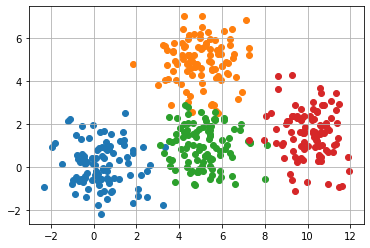

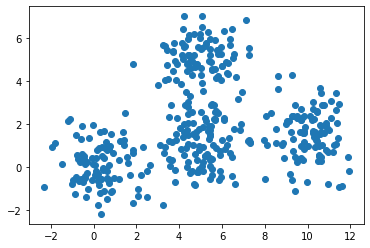

In [7]:
# write your code here
# later on, we need to compare GMM and k-means, so let's just use the same dataset initially itself.
# this is way more efficient (in terms of the assignment)

full_dist = np.concatenate((d1,d2,d3,d4))
ax1 = plt.figure()
plt.grid()
plt.scatter(d1[:,0], d1[:,1])
plt.scatter(d2[:,0], d2[:,1])
plt.scatter(d3[:,0], d3[:,1])
plt.scatter(d4[:,0], d4[:,1])

# print(real_labels)
# concatenate all this to form an unlabelled dataset
full_dist = np.concatenate((d1,d2,d3,d4))
ax2 = plt.figure()
plt.scatter(full_dist[:,0], full_dist[:,1])

**Step 2. Initialization**

a) Mean vector (randomly any from the given data points) ($\mu_{k}$)

b) Covariance (initialize with (identity matrix)*max(data))  ($\Sigma_{k}$)

c) Weights (uniformly) ($w_{k}$), 
with constraint: $\sum_{k=1}^{K}w_{k}=1$

In [8]:
def initialization(data, K):
    N = data.shape[1]
    M = data.shape[0]
    means = np.random.randint(0, M, K)
    means = data[means,:]
    means = np.array(means)

    covariance = np.zeros((N, N, K))
    for i in range(K):
        covariance[:,:,i] = np.identity(N) * np.max(data)

    weights = np.ones((K,1))/K
    
    theta = [means.T, covariance, weights]
    return theta

**Step 3: Expectation stage**

$$\gamma_{ik}=\frac{w_{k}P(x_{i}|\mu_{k},\Sigma_{k})}{\sum_{k=1}^{K}w_{k}P(x_{i}|\mu_{k},\Sigma_{k})}$$

where,

$$\theta_{k}=\{\mu_{k},\Sigma_{k},w_{k}\}$$
$$w_{k}=\frac{N_{k}}{N}$$
$$N_{k}=\sum_{i=1}^{N}\gamma_{ik}$$
$$P(x_{i}|\mu_{k},\Sigma_{k})=\frac{1}{(2 \pi)^{d/2}|\Sigma_{k}|^{1/2}}e^{-(x_{i}-\mu_{k})^{T}\Sigma_{k}^{-1}(x_{i}-\mu_{k})}$$

In [9]:
# E-Step GMM
from scipy.stats import multivariate_normal

def E_Step_GMM(data, K, theta):
    means = theta[0]
    covariance = theta[1]
    weights = theta[2]
    #Computing responsibility coefficients of each point for each cluster.
    responsibility = np.zeros((len(data),K))
    for i in range(K):
        it = 0 
        for x in data:
            sigma_wkp=0 
            P = multivariate_normal.pdf(x,mean=means[:,i], cov=covariance[:,:,i])
            responsibility[it][i]=weights[i] * P
            for j in range(K):
                sigma_wkp+=weights[j]*(multivariate_normal.pdf(x,mean=means[:,j], cov=covariance[:,:,j])+10**(-10))
            responsibility[it][i]=responsibility[it][i]/sigma_wkp
            it = it + 1

    return responsibility

**Step 4: Maximization stage**

a) $w_{k}=\frac{N_{k}}{N}$, where  $N_{k}=\sum_{i=1}^{N}\gamma_{ik}$

b) $\mu_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}x_{i}}{N_{k}}$

c) $\Sigma_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}(x_{i}-\mu_{k})(x_{i}-\mu_{k})^{T}}{N_{k}}$

Objective function(maximized through iteration):
$$L(\theta)=\sum_{i=1}^{N}log\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})$$ 

In [10]:
# M-STEP GMM

def M_Step_GMM(data,responsibility):
    
    [N, K] = np.shape(responsibility)
    Nk = np.sum(responsibility,axis=0)
    weights = Nk/N
    
    D = data.shape[1]
    means = np.zeros((K, D))

    for k in range(K):
        resp_kth = responsibility[:, k]
        temp = data * resp_kth[:, None] # multiplying a vector with multiple columns
        means[k] = (1/Nk[k]) * np.sum(temp,axis=0)  
    means = means.T
        
    #Compute Covariance
    covariance=np.zeros((D, D, K)) 
    for k in range(K):
        for n in range(N):
            covariance[:,:,k] += responsibility[n,k] * np.outer(data[n,:] - means[:,k], (data[n,:] - means[:,k]).T) # resp * vec outer prod
        covariance[:,:,k] = (1/Nk[k])*covariance[:,:,k]
    
    likelihood = 0
    log_likelihood = 0
    for n in range(N):
        for k in range(K):
            likelihood += weights[k] * (multivariate_normal.pdf(data[n,:],mean=means[:,k], cov=covariance[:,:,k]))
        log_likelihood += np.log(likelihood)

    theta = [means, covariance, weights]
    return theta, log_likelihood

**Step 5: Final run (EM algorithm)**

a) Initialization

b)Iterate E-M untill $L(\theta_{n})-L(\theta_{n-1}) \leq th$ 

c) Plot and see the cluster allocation at each iteration

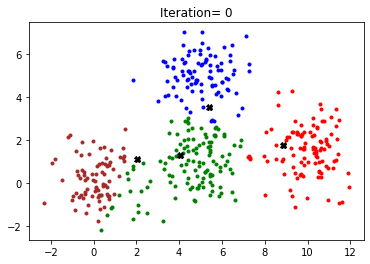

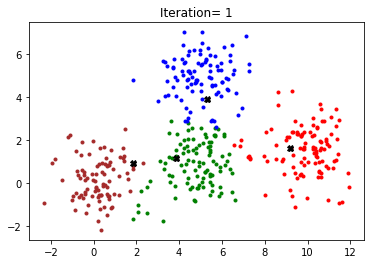

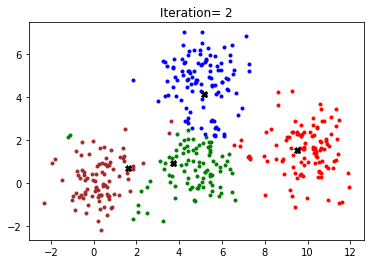

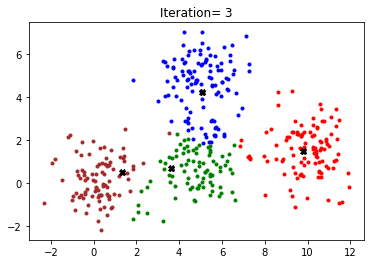

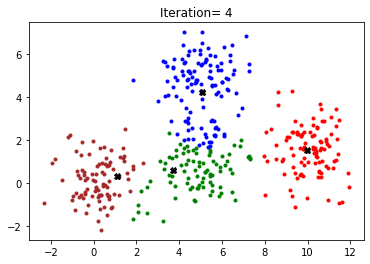

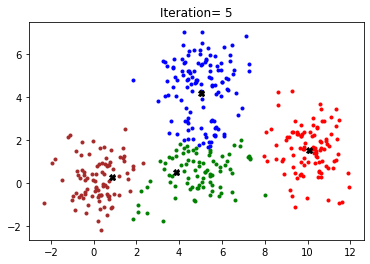

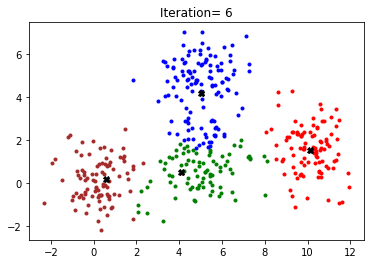

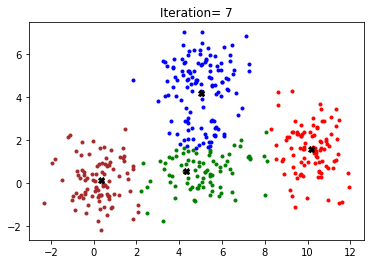

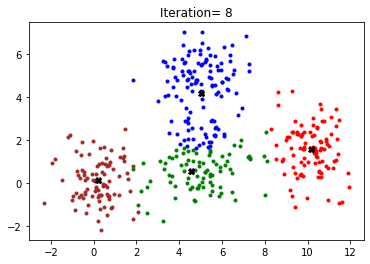

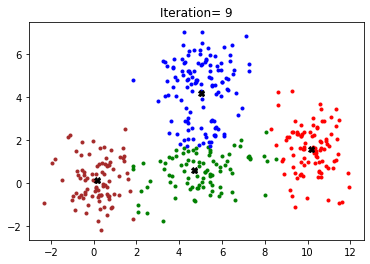

Final graph



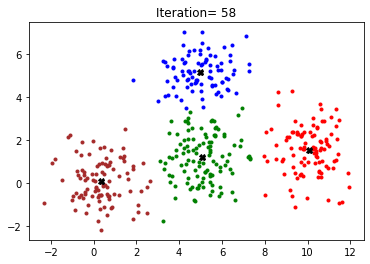

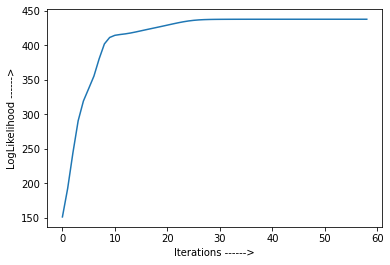

In [11]:
log_l=[]
Itr=100
clr=['red',"green","blue","brown"]

K = 4   # no. of clusters
benchmark = 0.000001

theta = initialization(full_dist,K)
for n in range(Itr):

    responsibility=E_Step_GMM(full_dist,K,theta)

    cluster_label=np.argmax(responsibility,axis=1) #Label Points

    theta,log_likhd=M_Step_GMM(full_dist,responsibility)

    log_l.append(log_likhd)
    if(n<10):
        plt.figure()
        for l in range(K):
            id=np.where(cluster_label==l)
            plt.plot(full_dist[id,0],full_dist[id,1],'.',color=clr[l])
        Centroids=theta[0].T
        plt.plot(Centroids[:,0],Centroids[:,1],'X',color='k')
        plt.title('Iteration= %d' % (n))
        plt.show()

    if n>2:
        if abs(log_l[n]-log_l[n-1])<benchmark or n==Itr-1:
            plt.figure()
            print("Final graph\n")
            for l in range(K):
                id=np.where(cluster_label==l)
                plt.plot(full_dist[id,0],full_dist[id,1],'.',color=clr[l])
            Centroids=theta[0].T
            plt.plot(Centroids[:,0],Centroids[:,1],'X',color='k')
            plt.title('Iteration= %d' % (n))
            plt.show()
            break

plt.figure()
plt.xlabel("Iterations ------>")
plt.ylabel("LogLikelihood ------>")
plt.plot(log_l)

**Step 6 : Performance metric**

Compute Homogeneity score and Silhouette coefficient using the information given below 

Homogeneity score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Silhouette coeeficient : 

$a(x)$ : Average distance of x to all other vectors in same cluster

$b(x)$ : Average distance of x to the vectors in other clusters. Find minimum among the clusters

$s(x)$ = $\frac{b(x) - a(x)}{max(a(x),b(x))}$

Silhouette coefficient (SC) : 

$$ SC =  \frac{1}{N}\sum_{i=1}^{N}s(x) $$

In [12]:
# write your code here
centroids = np.transpose(theta[0])
covariance = theta[1]
weights = theta[2]

predicted_scores_gmm = []
for i in range(full_dist.shape[0]):
    ans = []
    for k in range(4):
        ll = weights[k]*(multivariate_normal.pdf(full_dist[i,:], mean=centroids[k,:], cov=covariance[:,:,k]))
        ans.append(ll)
    predicted_scores_gmm.append(np.argmax(ans))

from sklearn.metrics import homogeneity_score
#For homogeneity Score
homogeneity_score_gmm = homogeneity_score(labels_true=real_labels, labels_pred=predicted_scores_gmm)
print("homogeneity score", homogeneity_score_gmm)


predicted_scores_gmm = np.array(predicted_scores_gmm)
# For Silhouette Score
silhouette_value_gmm = 0
for i in range(full_dist.shape[0]):
    total_distance = 0
    count = 0
    x = full_dist[i]
    cluster_of_x = predicted_scores_gmm[i]
    other_same_cluster = np.where(predicted_scores_gmm == cluster_of_x)[0]
    for point in other_same_cluster:
        if(point == i):
            continue
        total_distance += modulus(full_dist[point],x)
        count += 1
    average_dist_same_cluster = total_distance/(count+0.0001)

    total_distance = 0
    count = 0
    other_diff_cluster = np.where(predicted_scores_gmm != cluster_of_x)[0]
    for point in other_diff_cluster:
        total_distance += modulus(full_dist[point],x)
        count += 1
    average_dist_other_clusters = total_distance/(count + 0.0001)
    silhouette_value_gmm += (average_dist_other_clusters - average_dist_same_cluster)/max(average_dist_other_clusters, average_dist_same_cluster)
    
silhouette_value_gmm /= 400
print("Silhouette value",silhouette_value_gmm)

homogeneity score 0.8855097970112225
Silhouette value 0.7027960598058013


# GMM v/s K-means

(a) Generate Data to show shortcomings of Kmeans and advantage of GMM over it

(b) Perform GMM on the same data and justify how it is better than K-means in that particular case

(c) Verify the same using performance metrics

In [13]:
print("For K means")
print("Silhouette_value = ", silhouette_value_kmeans)
print("Homogeneity_score = ", homogeneity_score_kmeans)
print("For GMM")
print("Silhouette_value = ", silhouette_value_gmm)
print("Homogeneity_score = ", homogeneity_score_gmm)

For K means
Silhouette_value =  0.6867301276047415
Homogeneity_score =  0.833038321018082
For GMM
Silhouette_value =  0.7027960598058013
Homogeneity_score =  0.8855097970112225


# Practical Use Case : K-means Clustering

For this exercise we will be using the **IRIS FLOWER DATASET** and explore how K-means clustering is performing

**IRIS Dataset** consists of 50 samples from each of the three species of Iris flower (Iris Setosa, Iris Viriginca and Iris Versicolor)

Four features were measured from each sample : Length of Sepals, Width of sepals, Length of Petals, Width of Sepals all in centimeters. Based on the combinations of these 4 features each flower was categorized into one of the 3 species




**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Perform analysis of Dataset, Plot the following features : (Sepal Length vs Sepal Width), (Petal Length vs Petal Width)


(c) Next group the data points into 3 clusters using the above K-means Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(d) Next use scikit learn tool to perform K-means Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(e) Vary the Number of Clusters (K) and run K-means algorithm from 1-10 and find the optimal number of clusters

In [14]:
import pandas as pd
data = pd.read_csv(r"IRIS.csv")
data[['target']] = data[['species']].apply(lambda col:pd.Categorical(col).codes)
x = np.asarray(data[['sepal_length','sepal_width','petal_length','petal_width']].values.tolist())
y = (data[['species']].apply(lambda col:pd.Categorical(col).codes)).values.tolist()
target = np.asarray([item for sublist in y for item in sublist])

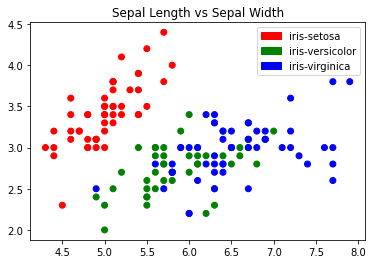

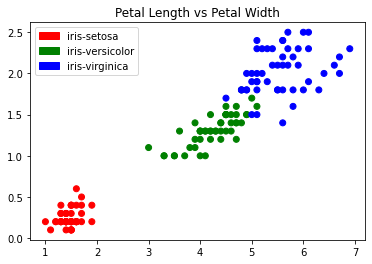

In [15]:
#plkot
import matplotlib.patches as mpatches
colors = np.array(['red', 'green', 'blue'])
red_patch = mpatches.Patch(color=colors[0], label='iris-setosa')
green_patch = mpatches.Patch(color=colors[1], label='iris-versicolor')
blue_patch = mpatches.Patch(color=colors[2], label='iris-virginica')
legends=[red_patch, green_patch, blue_patch]


plt.scatter(data['sepal_length'], data['sepal_width'], c=colors[data['target']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=legends)
plt.show()


plt.scatter(data['petal_length'], data['petal_width'], c= colors[data['target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=legends)
plt.show()

reached itr  0
reached itr  1
reached itr  2
reached itr  3
reached itr  4
reached itr  5
reached itr  6
reached itr  7
reached itr  8
performance of our kmeans with 3 clusters= 0.7474865805095324
performance of scikit Kmeans with 3 clusters= 0.7649861514489815


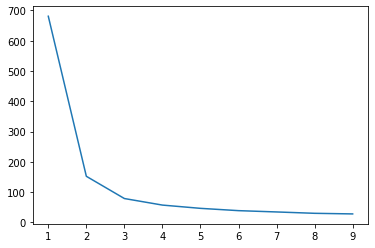

In [16]:
from sklearn import metrics
from sklearn.cluster import KMeans

def K_means_ours(data,K,itr,benchmark):
    # random initialization of clusters
    index=np.random.randint(0,data.shape[0],K)
    Cents=data[index,:]

    # initialized a array to store distance, assigned label, minimum distance
    DAL=np.zeros((data.shape[0],K+2))
    error=[]
    F=data+10**(-5)   
    

    for n in range(itr):
    # assignment stage
        print("reached itr ",n)
        for i in range(F.shape[0]):
            for j in range(K):
                DAL[i,j]=np.linalg.norm(F[i,:]-Cents[j,:])
            Dist=np.min(DAL[i,:K])
            
            ind=((np.where(Dist==DAL[i,:K])[0]))
            
            DAL[i,K]=ind.astype('int')
            DAL[i,K+1]=Dist

      # re-estimation stage
        for i in range(K):
            ind=np.where(DAL[:,K]==i)
            
            if (F[ind,:][0].shape[0])==0:
              id1=np.random.randint(0,data.shape[0],1)
              Cents[i,:]=F[id1,:]
            else:
              Cents[i,:]=np.mean(F[ind,:][0],axis=0)
        error.append(np.mean(DAL[:,K+1]))  
        if n>2:
            if np.abs(error[n]-error[n-1])<benchmark:
                break
        
    return DAL, Cents

DAL,cents=K_means_ours(x,3,100,benchmark)

predicted_kmeans=DAL[:,3]
print('performance of our kmeans with 3 clusters=',metrics.homogeneity_score(predicted_kmeans,target))

#Sklearn Kmeans
kmeans = KMeans(n_clusters=3,n_init=100,max_iter=100,verbose=0)
kmeans.fit(x)
predicted_kmeans_sk=kmeans.predict(x)
print('performance of scikit Kmeans with 3 clusters=',metrics.homogeneity_score(predicted_kmeans_sk,target))

dist_points_from_cluster_center = []
K = range(1,10)
for no_of_clusters in K:
    k_model = KMeans(n_clusters=no_of_clusters,max_iter=20)
    k_model.fit(x)
    dist_points_from_cluster_center.append(k_model.inertia_)
plt.plot(K, dist_points_from_cluster_center)

# Practical Use Case : GMM

**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Next group the data points into 3 clusters using the above GMM Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(c) Next use scikit learn tool to perform GMM Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

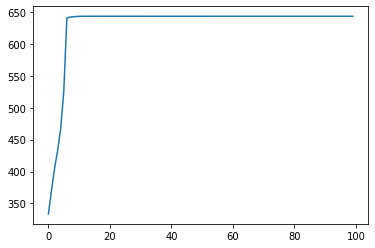

performance of our GMM= 0.6470651897561797
Confusion Matrix
 [[ 0  0 50]
 [15 35  0]
 [38 12  0]]
Initialization 0
Initialization converged: True
performance of sklearn= 0.7859016861703576
Confusion Matrix
 [[ 0 50  0]
 [49  0  1]
 [14  0 36]]


In [17]:
from sklearn.mixture import GaussianMixture as Gmm
K=3  # num of clusters

theta=initialization(x,K)
log_l=[]
for n in range(Itr):
    responsibility=E_Step_GMM(x,K,theta)
    cluster_label=np.argmax(responsibility,axis=1) #Label Points
    theta,log_likhd=M_Step_GMM(x,responsibility)
    log_l.append(log_likhd)

plt.figure()  
plt.plot(log_l)
plt.show()
predicted_gmm=cluster_label
print('performance of our GMM=',metrics.homogeneity_score(predicted_gmm,target))
print("Confusion Matrix\n",metrics.confusion_matrix(y_true=target,y_pred=predicted_gmm))

#sklearn
gmm=Gmm(n_components=3, init_params='kmeans',covariance_type='diag',verbose=1)
gmm.fit(x)

# performance measure
predicted_gmm_sk=gmm.predict(x)
print('performance of sklearn=',metrics.homogeneity_score(predicted_gmm_sk,target))
print("Confusion Matrix\n",metrics.confusion_matrix(y_true=target,y_pred=predicted_gmm_sk))